In [62]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os, sys

matplotlib.rcParams['figure.figsize']  = (20.0, 10.0)
matplotlib.rcParams['axes.grid']       = False
matplotlib.rcParams['font.size']       = 15
matplotlib.rcParams['axes.labelsize']  = 0.9*plt.rcParams['font.size']
matplotlib.rcParams['axes.titlesize']  = 1.2*plt.rcParams['font.size']
matplotlib.rcParams['legend.fontsize'] = plt.rcParams['font.size']
matplotlib.rcParams['xtick.labelsize'] = 0.8*plt.rcParams['font.size']
matplotlib.rcParams['ytick.labelsize'] = 0.8*plt.rcParams['font.size']
matplotlib.rcParams['scatter.marker']  = 'o'
matplotlib.rcParams['axes.titlepad']   = 20 
matplotlib.rcParams['xtick.major.pad']='8'
matplotlib.rcParams['ytick.major.pad']='8'

File = 'Results_2F_eigenvectors.txt'

In [63]:
mypath                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_2/Results/2F_info"
myfolder                = "2F_info/"


def read_files(path, folder):  
    ground_state_index = []
    omega_r = []
    repulsion = []
    for filename in os.listdir(path):
        omega_r.append(float(filename.split("_")[4]))
        repulsion.append(filename.split("_")[5])
        with open(folder + filename, 'r') as infile:
            lines = infile.readlines()[0]
            ground_state_index.append(int(lines.split()[2]))
    df = pd.DataFrame({"omega_r": omega_r, "gsi": ground_state_index, "repulsion": repulsion})
    return df

Info = read_files(mypath, myfolder)
HC_Info = Info[Info["repulsion"] == "HC"]
NC_Info = Info[Info["repulsion"] == "NC"]


0.01

In [70]:
HC_Info.sort_values(by=['omega_r'])

,omega_r,gsi,repulsion
5,0.01,47,HC
0,0.50,26,HC
6,1.00,13,HC
7,5.00,4,HC


In [71]:
NC_Info.sort_values(by=['omega_r'])

,omega_r,gsi,repulsion
1,0.01,32,NC
3,0.50,16,NC
4,1.00,16,NC
2,5.00,4,NC


In [72]:
mypath_HC                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_2/Results/2F/HC"
myfolder_HC                = "2F/HC/"
mypath_NC                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_2/Results/2F/NC"
myfolder_NC                = "2F/NC/"


def read_files(path, folder, df):
    omega_r = []
    eigenvec = []
    fsize = 30
    for filename in os.listdir(path):
        print(filename)
        omg_val = float(filename.split("_")[3])
        print(omg_val)
        
        for i in range(len(df)):
            print(df['omega_r'].values[i])
            if (omg_val == df['omega_r'].values[i]):
                omega_r.append(df['omega_r'].values[i])
                M = np.vstack(np.loadtxt(path +"/"+filename))
                eigenvec.append(M[:,df['gsi'].values[i]]**2)
                print(omg_val, df['omega_r'].values[i], df['gsi'].values[i])
    return omega_r, eigenvec

Data = read_files(mypath_HC, myfolder_HC, HC_Info)
Data_NC = read_files(mypath_NC, myfolder_NC, NC_Info)

Results_2F_eigenvectors_1.000000_HC_.txt
1.0
0.5
0.01
1.0
1.0 1.0 13
5.0
Results_2F_eigenvectors_0.500000_HC_.txt
0.5
0.5
0.5 0.5 26
0.01
1.0
5.0
Results_2F_eigenvectors_5.000000_HC_.txt
5.0
0.5
0.01
1.0
5.0
5.0 5.0 4
Results_2F_eigenvectors_0.010000_HC_.txt
0.01
0.5
0.01
0.01 0.01 47
1.0
5.0
Results_2F_eigenvectors_5.000000_NC_.txt
5.0
0.01
5.0
5.0 5.0 4
0.5
1.0
Results_2F_eigenvectors_1.000000_NC_.txt
1.0
0.01
5.0
0.5
1.0
1.0 1.0 16
Results_2F_eigenvectors_0.010000_NC_.txt
0.01
0.01
0.01 0.01 32
5.0
0.5
1.0
Results_2F_eigenvectors_0.500000_NC_.txt
0.5
0.01
5.0
0.5
0.5 0.5 16
1.0


/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


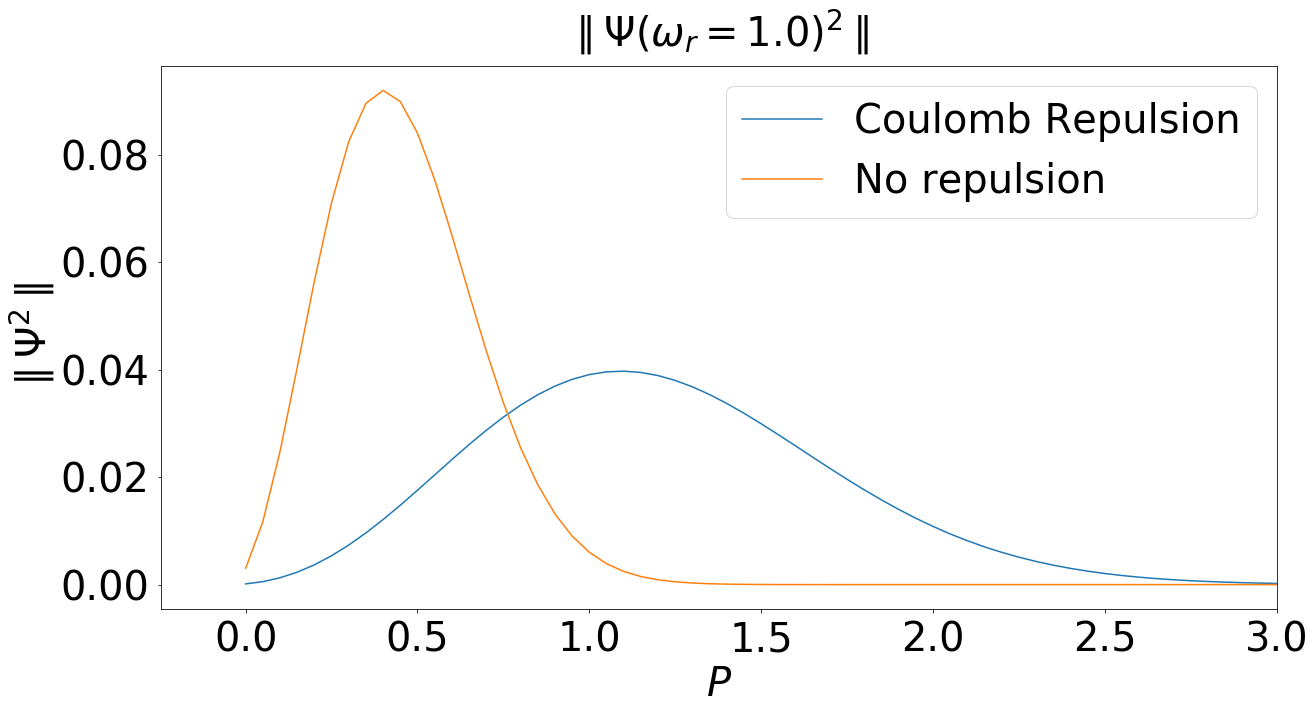

In [90]:
fsize = 40
nr_omega = 0
plt.figure(figsize = (20,10))
plt.title( "$\parallel \Psi (\omega_r = $"+str(Data[0][nr_omega]) + ")$^2\parallel$", fontsize = fsize)
plt.xlabel('$P$',fontsize = fsize)
plt.ylabel("$\parallel \Psi^2\parallel$", fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.plot(x,Data[1][nr_omega])
plt.plot(x,Data_NC[1][nr_omega])
plt.legend(['Coulomb Repulsion', "No repulsion"], fontsize = fsize)
plt.xlim(xmax = 3)
plt.savefig("Omega_0_01.png")

/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


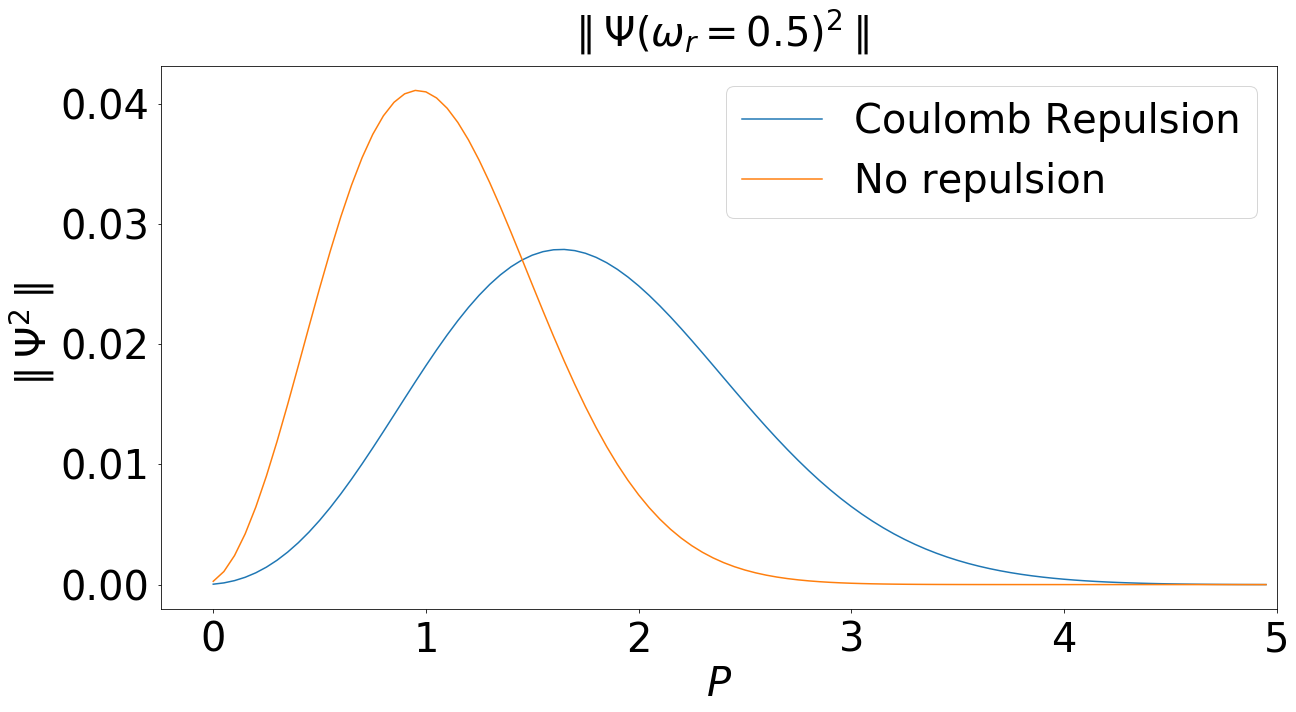

In [91]:

nr_omega = 1
plt.figure(figsize = (20,10))
plt.title( "$\parallel \Psi (\omega_r = $"+str(Data[0][nr_omega]) + ")$^2\parallel$", fontsize = fsize)
plt.xlabel('$P$',fontsize = fsize)
plt.ylabel("$\parallel \Psi^2\parallel$", fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.plot(x,Data[1][nr_omega])  
plt.plot(x,Data_NC[1][nr_omega])
plt.legend(['Coulomb Repulsion', "No repulsion"], fontsize = fsize)
plt.xlim(xmax = 5)
plt.savefig("Omega_1_0.png")

/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


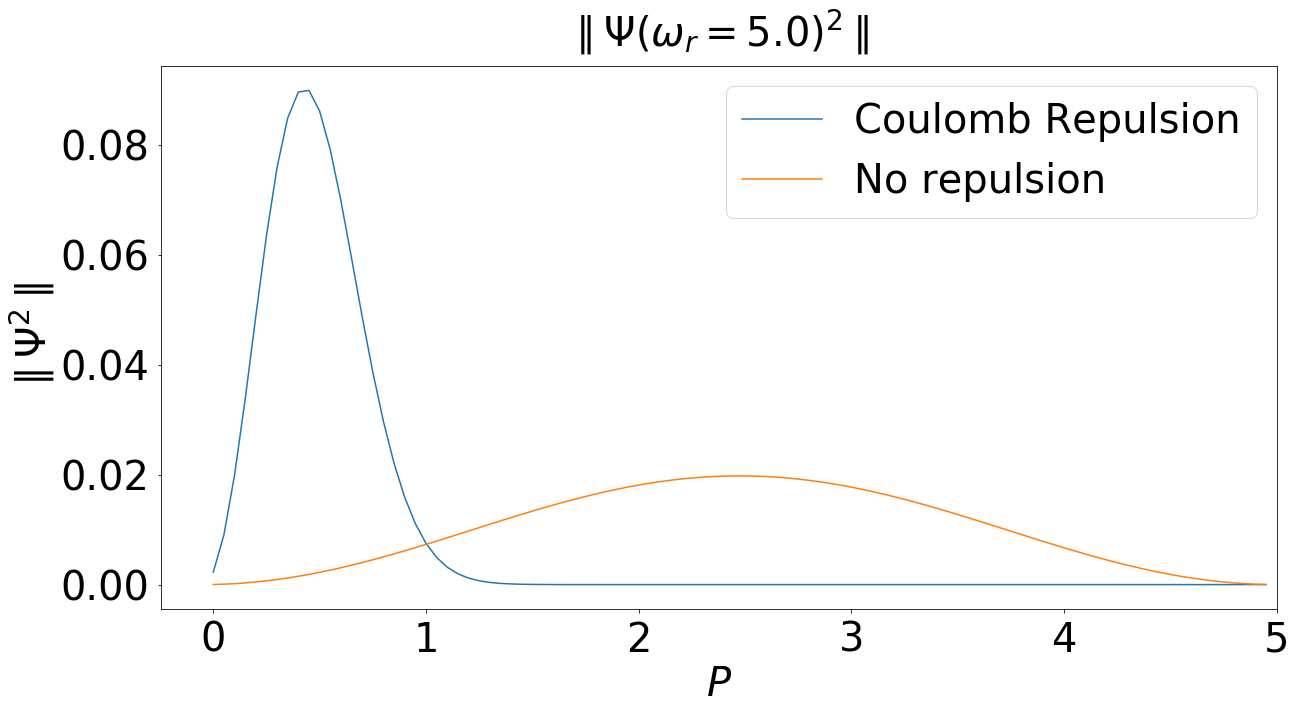

In [92]:

nr_omega = 2
plt.figure(figsize = (20,10))
plt.title( "$\parallel \Psi (\omega_r = $"+str(Data[0][nr_omega]) + ")$^2\parallel$", fontsize = fsize)
plt.xlabel('$P$',fontsize = fsize)
plt.ylabel("$\parallel \Psi^2\parallel$", fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.plot(x,Data[1][nr_omega])  
plt.plot(x,Data_NC[1][nr_omega])
plt.legend(['Coulomb Repulsion', "No repulsion"], fontsize = fsize)
plt.xlim(xmax = 5)
plt.savefig("Omega_5_0.png")

/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


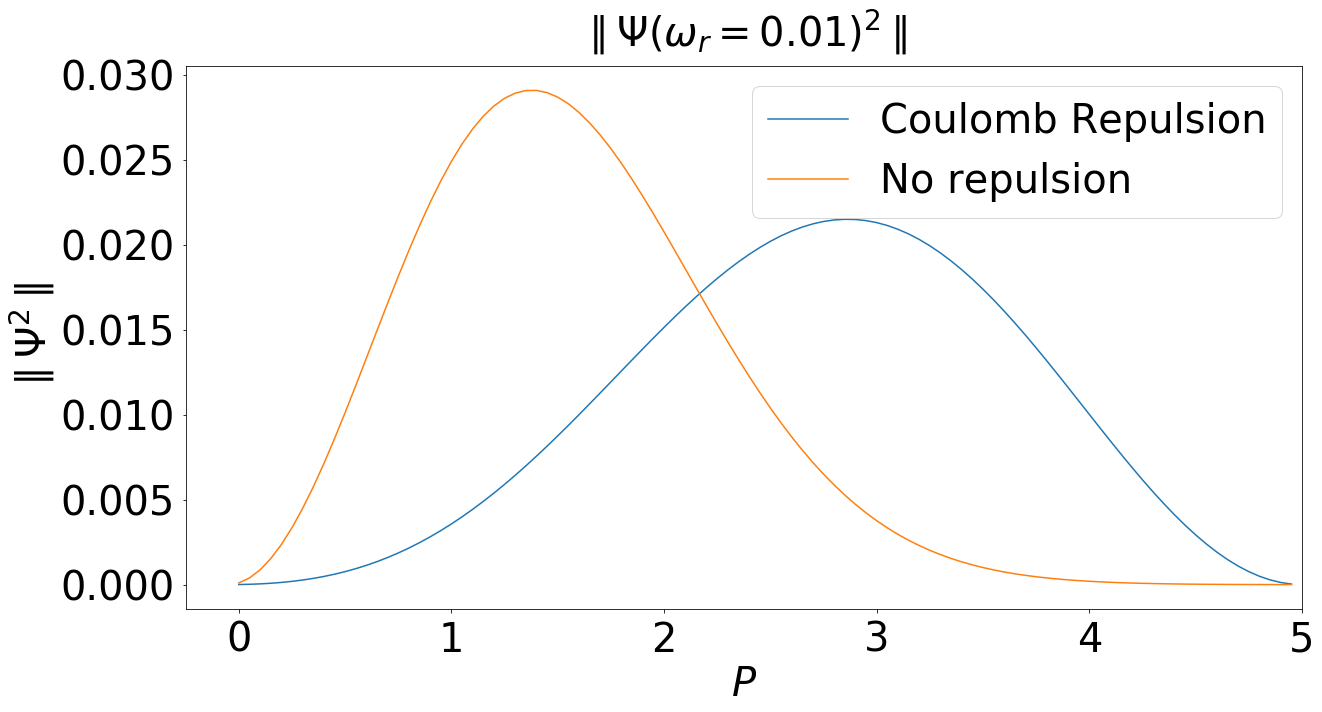

In [93]:

nr_omega = 3
plt.figure(figsize = (20,10))
plt.title( "$\parallel \Psi (\omega_r = $"+str(Data[0][nr_omega]) + ")$^2\parallel$", fontsize = fsize)
plt.xlabel('$P$',fontsize = fsize)
plt.ylabel("$\parallel \Psi^2\parallel$", fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.plot(x,Data[1][nr_omega])
plt.plot(x,Data_NC[1][nr_omega])
plt.legend(['Coulomb Repulsion', "No repulsion"], fontsize = fsize)
plt.xlim(xmax = 5)
plt.savefig("Omega_0_5.png")